# Lab 4 Linear Regression

In [4]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
sb.set() # set the default Seaborn style for graphics

In [5]:
dataBase = pd.read_csv('train.csv')


##### 1a) `Create appropriate datasets for Train and Test in an 80:20 ratio and fit a Linear Regression model on the Train set to predict SalePrice using GrLivArea. Print the coefficients of your model and plot the regression line.`

#### SalePrice and GrLivArea

In [6]:
saleGr = pd.DataFrame(dataBase[['SalePrice', 'GrLivArea']])
salesPrice = pd.DataFrame(dataBase['SalePrice'])
grLivArea = pd.DataFrame(dataBase['GrLivArea'])

####  GrLivArea [Predictor] / SalePrice [Response]
##### Train and Test (80:20) 
##### [Total Data is = 1460]
###### Test  =  292
###### Train = 1168

In [7]:
salepricetrain = pd.DataFrame(salesPrice[:1168])
grlivareatrain = pd.DataFrame(grLivArea[:1168])
salepricetest = pd.DataFrame(salesPrice[-292:])
grlivareatest = pd.DataFrame(grLivArea[-292:])
salepricetrain.describe()

,SalePrice
count,1168.000000
mean,180590.277397
std,78815.697902
min,34900.000000
25%,129900.000000
50%,162950.000000
75%,214000.000000
max,755000.000000


In [8]:
grlivareatrain.describe()

,GrLivArea
count,1168.000000
mean,1502.077055
std,506.607507
min,334.000000
25%,1120.750000
50%,1456.000000
75%,1761.750000
max,4676.000000


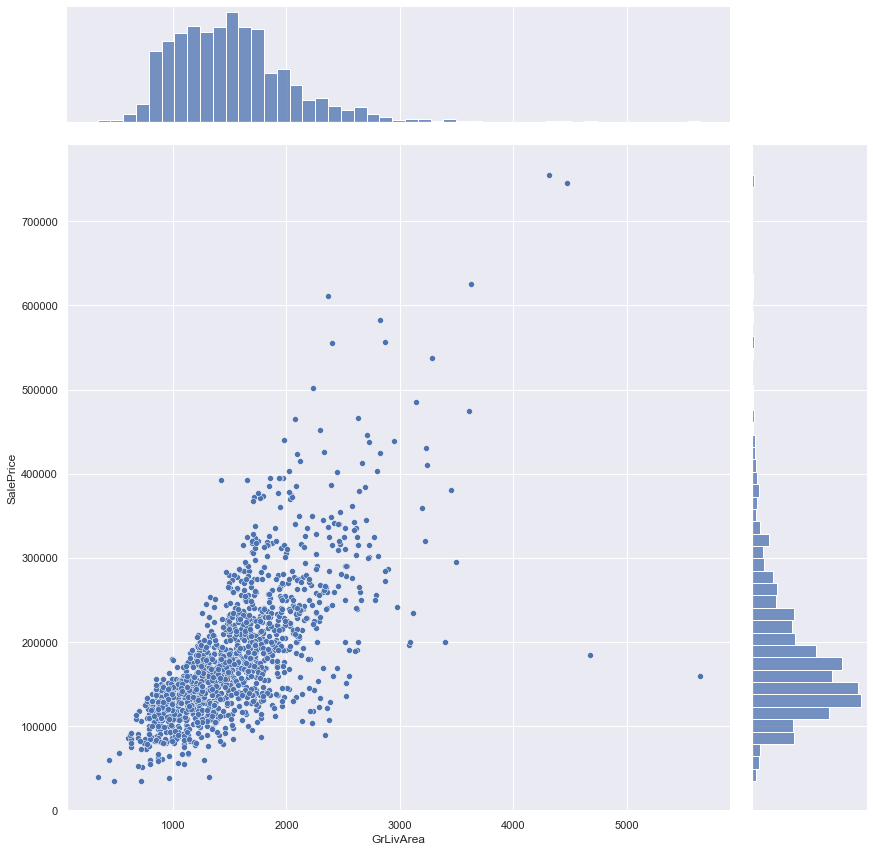

In [9]:
trainDF = pd.concat([salepricetrain, grlivareatrain], axis = 1).reindex(salepricetrain.index)
sb.jointplot(data = dataBase, x = "GrLivArea", y = "SalePrice", height = 12)

In [10]:
linreg = LinearRegression()
linreg.fit(grlivareatrain, salepricetrain)

LinearRegression()

Intercept 	: b =  [9592.75130193]
Coefficients 	: a =  [[113.84071513]]


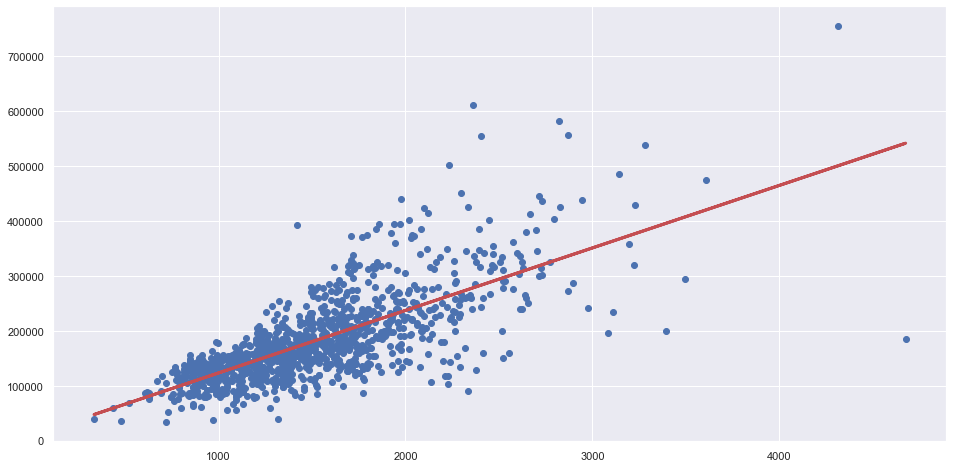

In [11]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
regline_x = grlivareatrain
regline_y = linreg.intercept_ + linreg.coef_ * grlivareatrain
f = plt.figure(figsize=(16, 8))
plt.scatter(grlivareatrain, salepricetrain)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

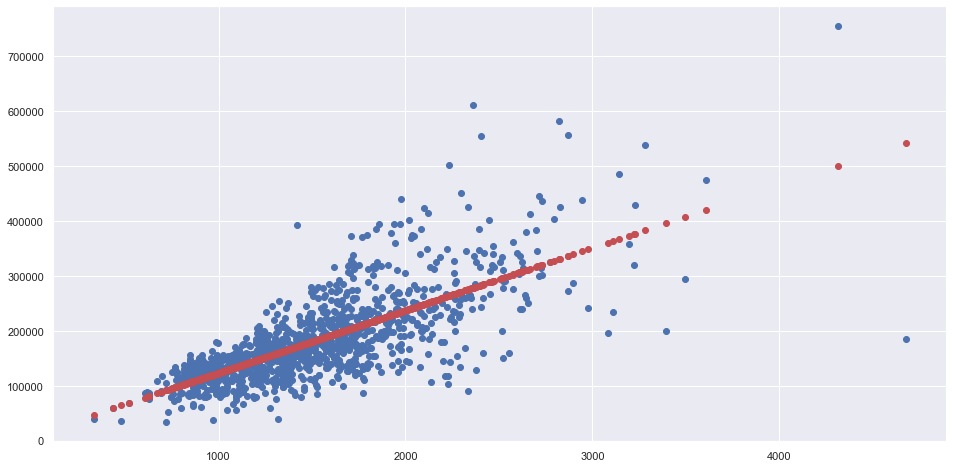

In [12]:
salepricetrain_pred = linreg.predict(grlivareatrain)
f = plt.figure(figsize=(16, 8))
plt.scatter(grlivareatrain, salepricetrain)
plt.scatter(grlivareatrain, salepricetrain_pred, color = "r")
plt.show()

##### 1b) `Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set. Print the metrics for Goodness of Fit and Prediction Accuracy that you think are appropriate in each scenario.`

#### Goodness of Fit of the Model

Check how good the predictions are on the Train Set.    
Metrics : Explained Variance and Mean Squared Error.

In [13]:
print("Explained Variance (R^2) \t:", linreg.score(grlivareatrain, salepricetrain))
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))
mse = mean_sq_err(salepricetrain, salepricetrain_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.5354427242263549
Mean Squared Error (MSE) 	: 2883319244.12025
Root Mean Squared Error (RMSE) 	: 53696.54778587028


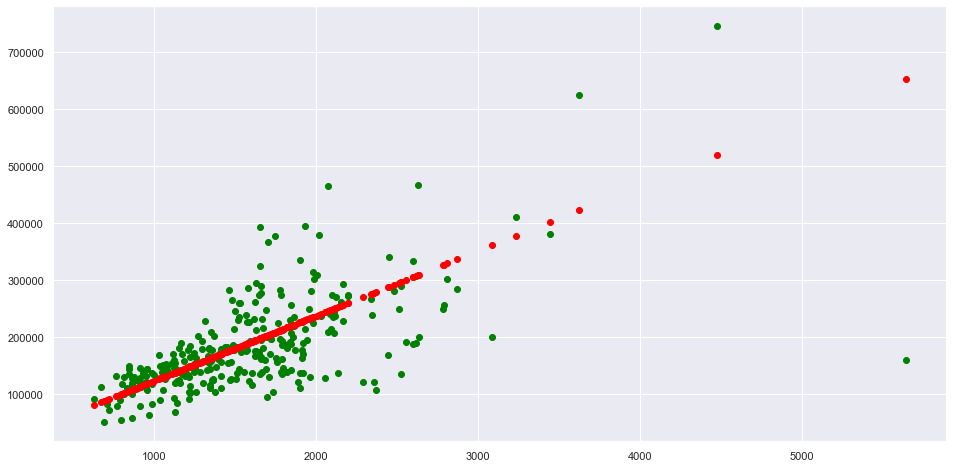

In [14]:
salepricetest_pred = linreg.predict(grlivareatest)
f = plt.figure(figsize=(16, 8))
plt.scatter(grlivareatest, salepricetest, color = "green")
plt.scatter(grlivareatest, salepricetest_pred, color = "red")
plt.show()

#### Goodness of Fit of Model for Test Set
Check how good the predictions are on the Test Set.    
Metrics : Explained Variance and Mean Squared Error.

In [15]:
testgrlivarea = linreg.score(grlivareatest, salepricetest)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))
GrLiVAreaMse = mean_sq_err(salepricetest, salepricetest_pred)

##### 2) `Following the steps from the previous problem, build two new uni-variate Linear Regression models to predict SalePrice using the variables TotalBsmtSF and GarageArea, individually. Justify which of the three models is the best in this case.`

In [16]:
tbsmt = pd.DataFrame(dataBase['TotalBsmtSF'])
garea = pd.DataFrame(dataBase['GarageArea'])
saletbsmtgarea = pd.DataFrame(dataBase[['SalePrice', 'TotalBsmtSF', 'GarageArea']])

In [17]:
from sklearn.model_selection import train_test_split
tbsmttrain, tbsmttest, gareatrain, gareatest = train_test_split(tbsmt, garea, test_size = 0.20)

### Basement Area

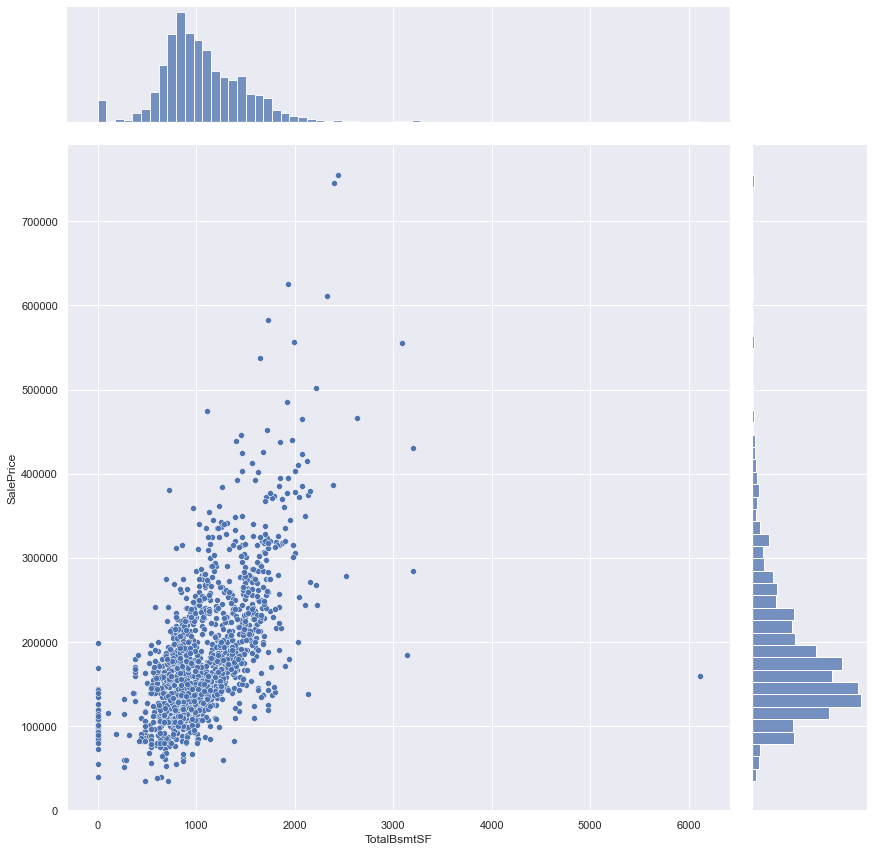

In [18]:
trainDF = pd.concat([salepricetrain, tbsmttrain], axis = 1).reindex(salepricetrain.index)
sb.jointplot(data = dataBase, x = "TotalBsmtSF", y = "SalePrice", height = 12)

In [19]:
linreg.fit(tbsmttrain, salepricetrain)

LinearRegression()

#### tbsmttrain

Intercept 	: b =  [179290.79857822]
Coefficients 	: a =  [[1.22605413]]


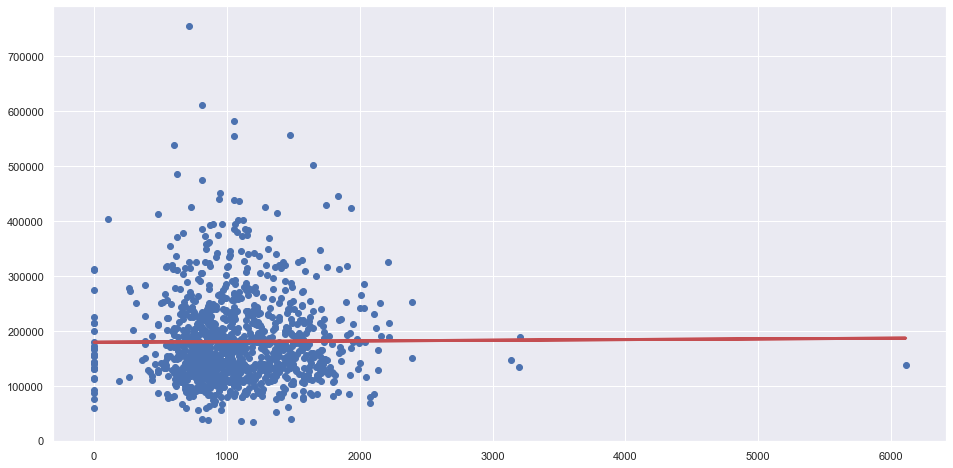

In [20]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
regline_x = tbsmttrain
regline_y = linreg.coef_ * tbsmttrain + linreg.intercept_  
f = plt.figure(figsize=(16, 8))
plt.scatter(tbsmttrain, salepricetrain)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [21]:
print("Explained Variance (R^2) \t:", linreg.score(tbsmttrain, salepricetrain))
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))
mse = mean_sq_err(salepricetrain, salepricetrain_pred)
print("Mean Squared Error (MSE) \t:", mse)

Explained Variance (R^2) 	: 4.682679222844932e-05
Mean Squared Error (MSE) 	: 2883319244.12025


#### tbsmtest

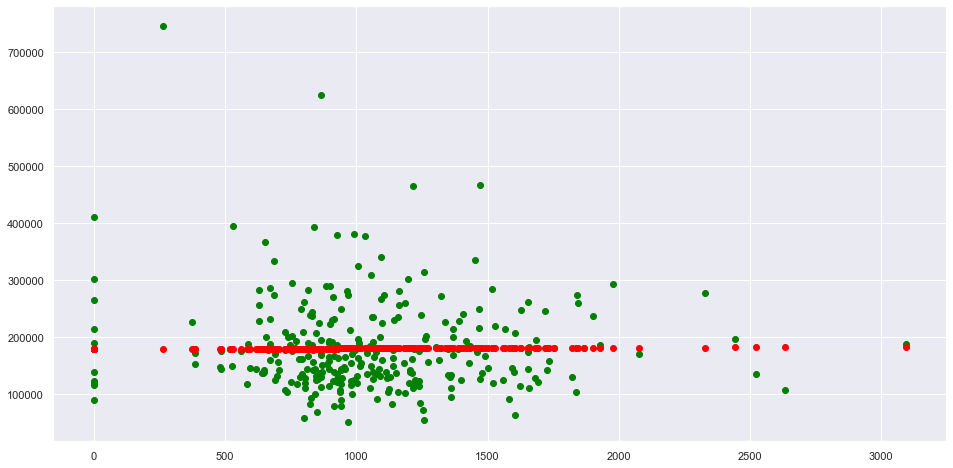

In [22]:
salepricetest_pred = linreg.predict(tbsmttest)
f = plt.figure(figsize=(16, 8))
plt.scatter(tbsmttest, salepricetest, color = "green")
plt.scatter(tbsmttest, salepricetest_pred, color = "red")
plt.show()

In [23]:
print("Explained Variance (R^2) \t:", linreg.score(tbsmttest, salepricetest))
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))
mse = mean_sq_err(salepricetest, salepricetest_pred)
print("Mean Squared Error (MSE) \t:", mse)

Explained Variance (R^2) 	: -0.00125408446975106
Mean Squared Error (MSE) 	: 6713778621.449061


### Garage Area

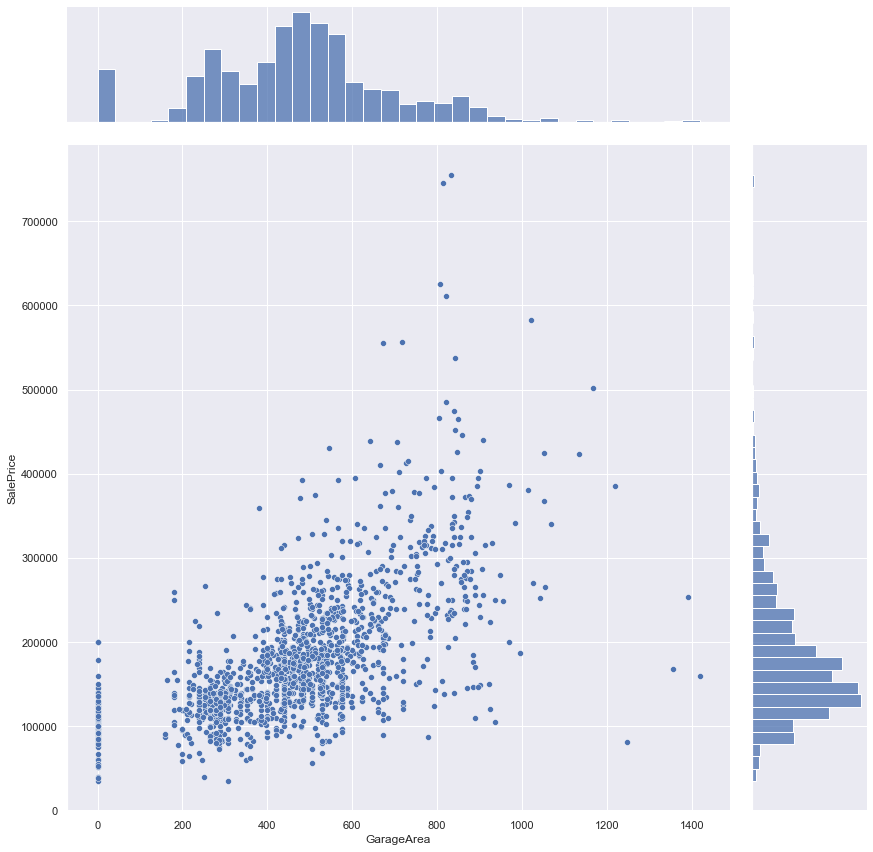

In [24]:
trainDF = pd.concat([salepricetrain, gareatrain], axis = 1).reindex(salepricetrain.index)
sb.jointplot(data = dataBase, x = "GarageArea", y = "SalePrice", height = 12)

In [25]:
linreg.fit(gareatrain, salepricetrain)

LinearRegression()

#### gareatrain 

Intercept 	: b =  [181219.31681311]
Coefficients 	: a =  [[-1.32785248]]


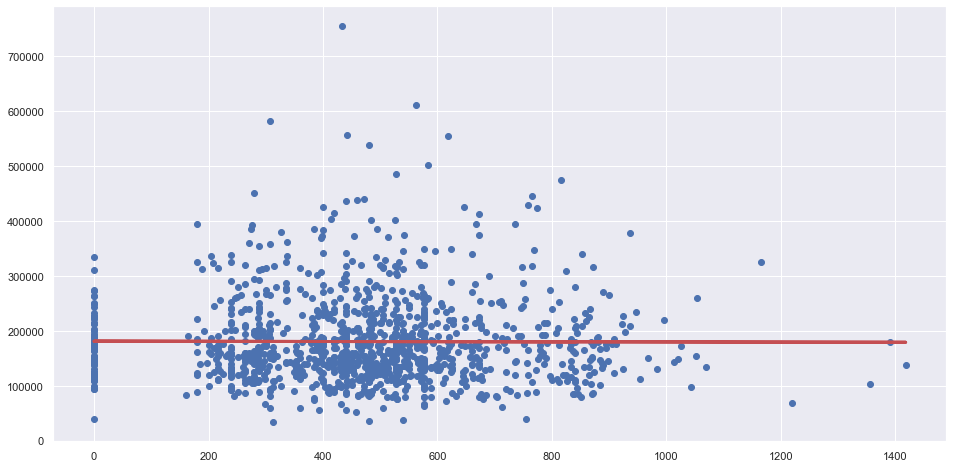

In [26]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
regline_x = gareatrain
regline_y = linreg.coef_ * gareatrain + linreg.intercept_ 
f = plt.figure(figsize=(16, 8))
plt.scatter(gareatrain, salepricetrain)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [27]:
print("Explained Variance (R^2) \t:", linreg.score(gareatrain, salepricetrain))
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))
mse = mean_sq_err(salepricetrain, salepricetrain_pred)
print("Mean Squared Error (MSE) \t:", mse)

Explained Variance (R^2) 	: 1.30328725403972e-05
Mean Squared Error (MSE) 	: 2883319244.12025


#### gareatest

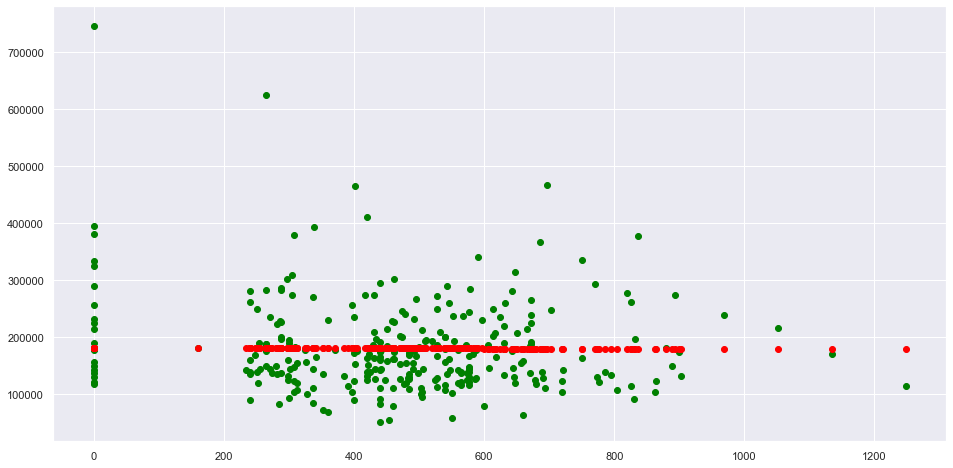

In [28]:
salepricetest_pred = linreg.predict(gareatest)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(gareatest, salepricetest, color = "green")
plt.scatter(gareatest, salepricetest_pred, color = "red")
plt.show()

In [29]:
print("Explained Variance (R^2) \t:", linreg.score(gareatest, salepricetest))
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))
mse = mean_sq_err(salepricetest, salepricetest_pred)
print("Mean Squared Error (MSE) \t:", mse)

Explained Variance (R^2) 	: 0.00047332713763004186
Mean Squared Error (MSE) 	: 6702195688.3055525


In [30]:
print("GrLivArea")
print("Explained Variance (R^2) \t:", testgrlivarea )
print("Mean Squared Error (MSE) \t:", GrLiVAreaMse)
print("\n")
print("TotalBsmtSF")
print("Explained Variance (R^2) \t: -0.0004950891788646494")
print("Mean Squared Error (MSE) \t: 6708689277.558462")
print("\n")
print("GarageArea")
print("Explained Variance (R^2) \t: -7.44885693277908e-05")
print("Mean Squared Error (MSE) \t: 6705868995.05048")

GrLivArea
Explained Variance (R^2) 	: 0.3683894557150508
Mean Squared Error (MSE) 	: 4235182093.2124324


TotalBsmtSF
Explained Variance (R^2) 	: -0.0004950891788646494
Mean Squared Error (MSE) 	: 6708689277.558462


GarageArea
Explained Variance (R^2) 	: -7.44885693277908e-05
Mean Squared Error (MSE) 	: 6705868995.05048


###### As seen in the values compared aboce, GrLivArea is the best option due to it's lowest "Mean Squared Error" and highest "Explained Variance"

##### 3a) `Find the houses (rows) that are “outliers” for GrLivArea and/or SalePrice. This means outliers for GrLivArea UNION outliers for SalePrice in a set notation. Remove all these “outliers” from the dataset so that it is clean. `

In [31]:
from matplotlib.cbook import boxplot_stats  

Outlier for SalePrice:  61


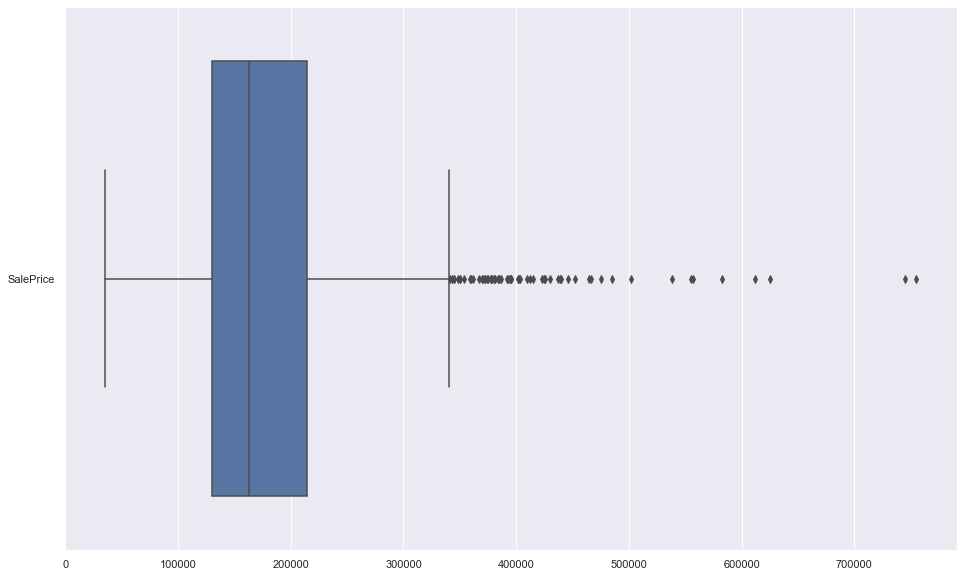

In [32]:
f = f = plt.figure(figsize=(16,10))
sb.boxplot(data = salesPrice, orient = "h")
outlier = len(boxplot_stats(dataBase.SalePrice).pop(0)['fliers'])
print('Outlier for SalePrice: ', outlier)

Outlier for LotArea:  31


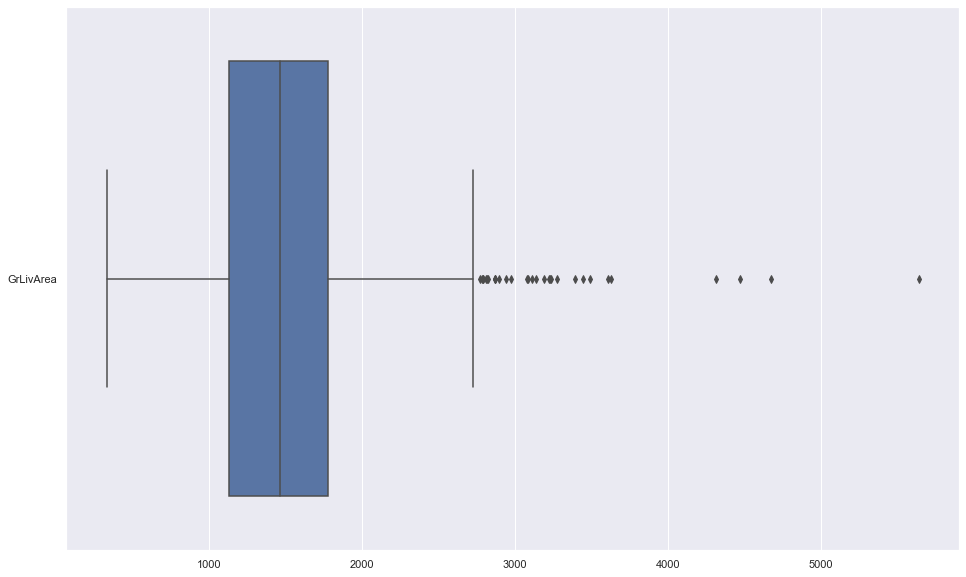

In [33]:
f = f = plt.figure(figsize=(16,10))
sb.boxplot(data = grLivArea, orient = "h")
outlier = len(boxplot_stats(dataBase.GrLivArea).pop(0)['fliers'])
print('Outlier for LotArea: ', outlier)

In [34]:
col = ['SalePrice','GrLivArea']
Q1 = np.percentile(saleGr[col], 25, interpolation = 'midpoint')
Q3 = np.percentile(saleGr[col], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
upper = np.where(saleGr[col] > (Q3+1.5*IQR))
lower = np.where(saleGr[col] < (Q1-1.5*IQR))
saleGr.drop(upper[0], inplace = True)
saleGr.drop(lower[0], inplace= True)

##### 3b) `In the outlier-free dataset, create Train and Test sets with an 80:20 ratio, and fit a Linear Regression model onthe Train set to predict SalePrice using GrLivArea. Print the model coefficients and plot the regression line.`

In [35]:
salepricenew = pd.DataFrame(saleGr['SalePrice'])
grlivareanew = pd.DataFrame(saleGr['GrLivArea'])

In [36]:
salepricenewtrain = pd.DataFrame(salepricenew[:1148])
salepricenewtest = pd.DataFrame(salepricenew[-287:])
grlivareanewtrain = pd.DataFrame(grlivareanew[:1148])
grlivareanewtest = pd.DataFrame(grlivareanew[-287:])

In [37]:
linreg.fit(grlivareanewtrain, salepricenewtrain)

LinearRegression()

Intercept 	: b =  [29570.17399352]
Coefficients 	: a =  [[98.37004983]]


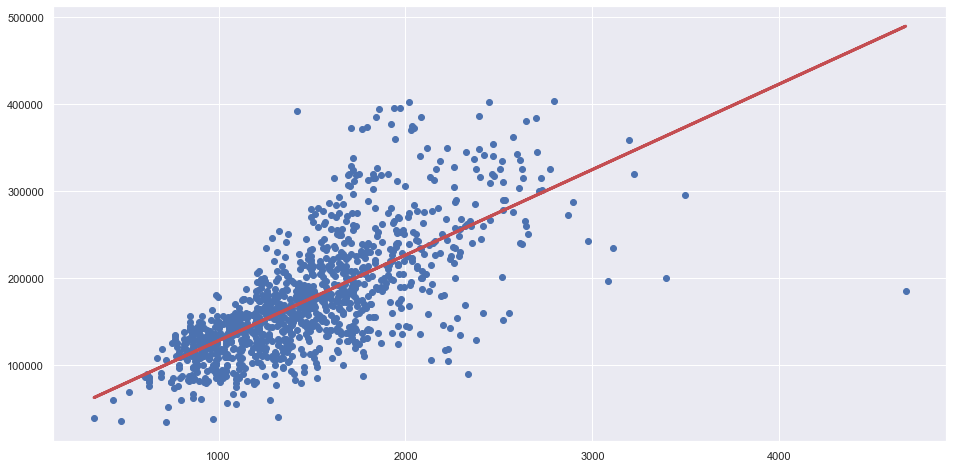

In [38]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
regline_x = grlivareanewtrain
regline_y = linreg.intercept_ + linreg.coef_ * grlivareanewtrain
f = plt.figure(figsize=(16, 8))
plt.scatter(grlivareanewtrain, salepricenewtrain)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

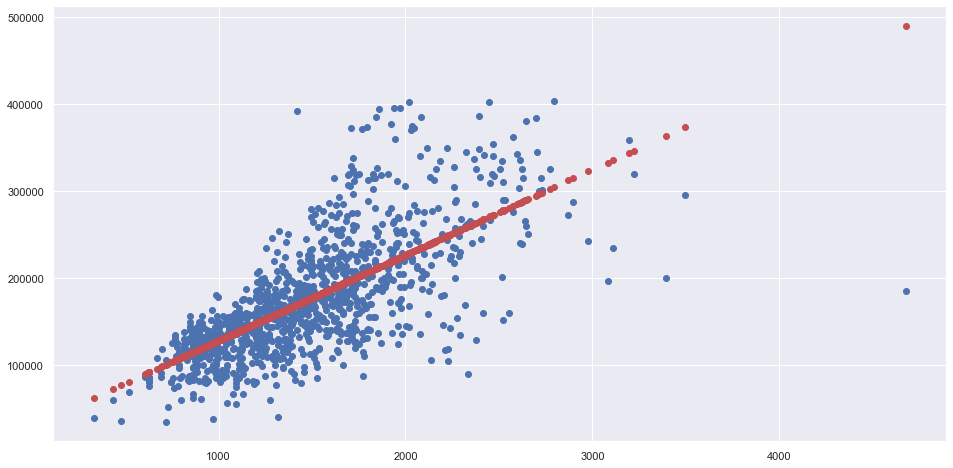

In [39]:
salepricetrain_pred = linreg.predict(grlivareanewtrain)
f = plt.figure(figsize=(16, 8))
plt.scatter(grlivareanewtrain, salepricenewtrain)
plt.scatter(grlivareanewtrain, salepricetrain_pred, color = "r")
plt.show()

##### 3c) `Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set. Do you think this model is better than the model obtained in Problem 1 for the same variables? Briefly justify.`

#### grlivareanewtrain

In [40]:
print("Explained Variance (R^2) \t:", linreg.score(grlivareanewtrain, salepricenewtrain))
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))
mse = mean_sq_err(salepricenewtrain, salepricetrain_pred)
print("Mean Squared Error (MSE) \t:", mse)

Explained Variance (R^2) 	: 0.4913826223725938
Mean Squared Error (MSE) 	: 2282868028.185639


#### grlivareanewtest

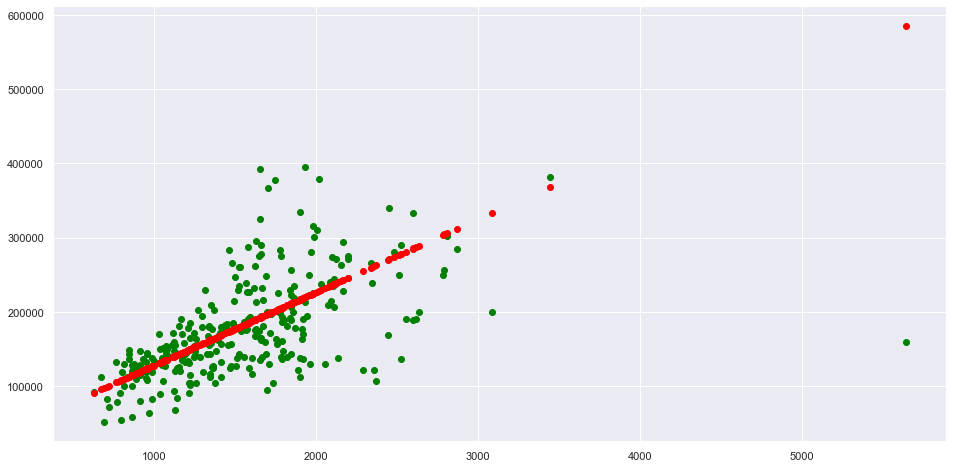

In [41]:
salepricetest_pred = linreg.predict(grlivareanewtest)
f = plt.figure(figsize=(16, 8))
plt.scatter(grlivareanewtest, salepricenewtest, color = "green")
plt.scatter(grlivareanewtest, salepricetest_pred, color = "red")
plt.show()

In [42]:
test_GrLiVArea = linreg.score(grlivareanewtest, salepricenewtest)
print("Explained Variance (R^2) \t:", test_GrLiVArea)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

GrLiVAreaMse = mean_sq_err(salepricenewtest, salepricetest_pred)
print("Mean Squared Error (MSE) \t:", GrLiVAreaMse)

Explained Variance (R^2) 	: 0.22278684052957454
Mean Squared Error (MSE) 	: 3307423721.99837


In [43]:
print("<GrLivArea with outliers>")
print("Explained Variance (R^2) \t: 0.3683894557150508")
print("Mean Squared Error (MSE) \t: 4235182093.2124324")
print("\n")
print("<GrLivArea with outliers>")
print("Explained Variance (R^2) \t: 0.22278684052957454")
print("Mean Squared Error (MSE) \t: 3307423721.99837")

<GrLivArea with outliers>
Explained Variance (R^2) 	: 0.3683894557150508
Mean Squared Error (MSE) 	: 4235182093.2124324


<GrLivArea with outliers>
Explained Variance (R^2) 	: 0.22278684052957454
Mean Squared Error (MSE) 	: 3307423721.99837


###### As seen here, it states that while although the value with outliers have a higher "Mean Square Error", it also has has a higher "Explained Variance". Therefore the anwser is no and the model obtained in Problem 1 is slightly better